In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime,time
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("/content/My Uber Drives - 2016.csv")
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [ ]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
df.columns=df.columns.str.replace("*",'')

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
df.shape

(1156, 7)

In [ ]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [ ]:
df.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

<AxesSubplot:>

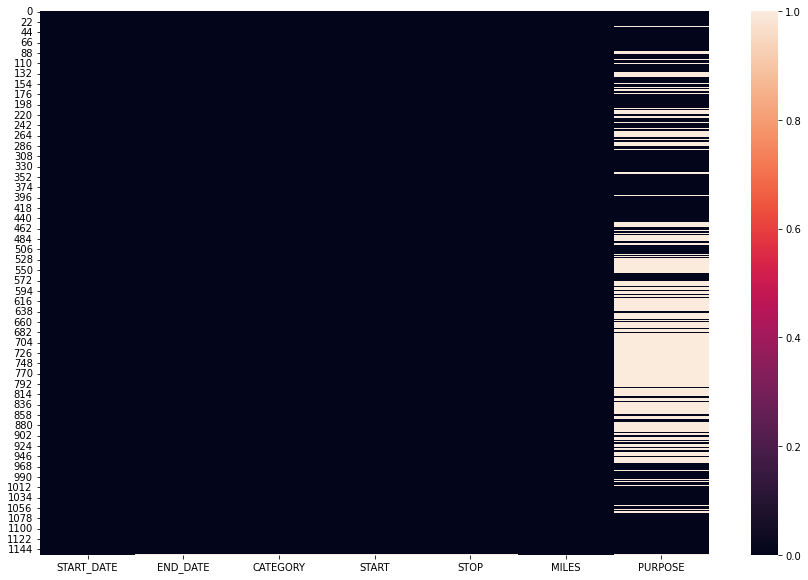

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isna())

In [ ]:
df.dropna(axis=0,subset=['END_DATE','CATEGORY','START','STOP'],how='all',inplace=True)

In [ ]:
df.isna().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [ ]:
#ffill=forwordfill(propogate last valid observation forword)
df['PURPOSE'].fillna(method='ffill',inplace=True)

In [ ]:
df.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [ ]:
df.isna().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [ ]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [ ]:
#convert argument to datetime
#Using errors='coerce',it will replace all non-numeric values with NaN
df['START_DATE']=pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE']=pd.to_datetime(df['END_DATE'],errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [ ]:
df['CATEGORY'].value_counts()

Business    1078
Personal      77
Name: CATEGORY, dtype: int64

<AxesSubplot:>

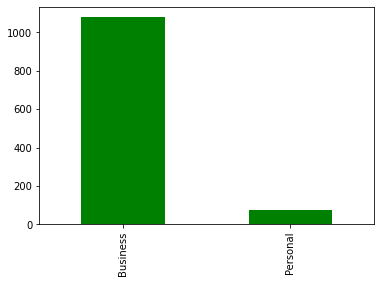

In [ ]:
df['CATEGORY'].value_counts().plot(kind='bar',color='g')

In [ ]:
start_point=df['START'].value_counts()
start_point

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START, Length: 177, dtype: int64

In [ ]:
start_point.head()

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Name: START, dtype: int64

<AxesSubplot:ylabel='START'>

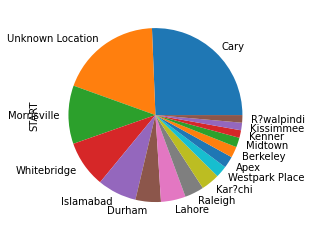

In [ ]:
start_point[start_point>10].plot(kind='pie')

<AxesSubplot:ylabel='START'>

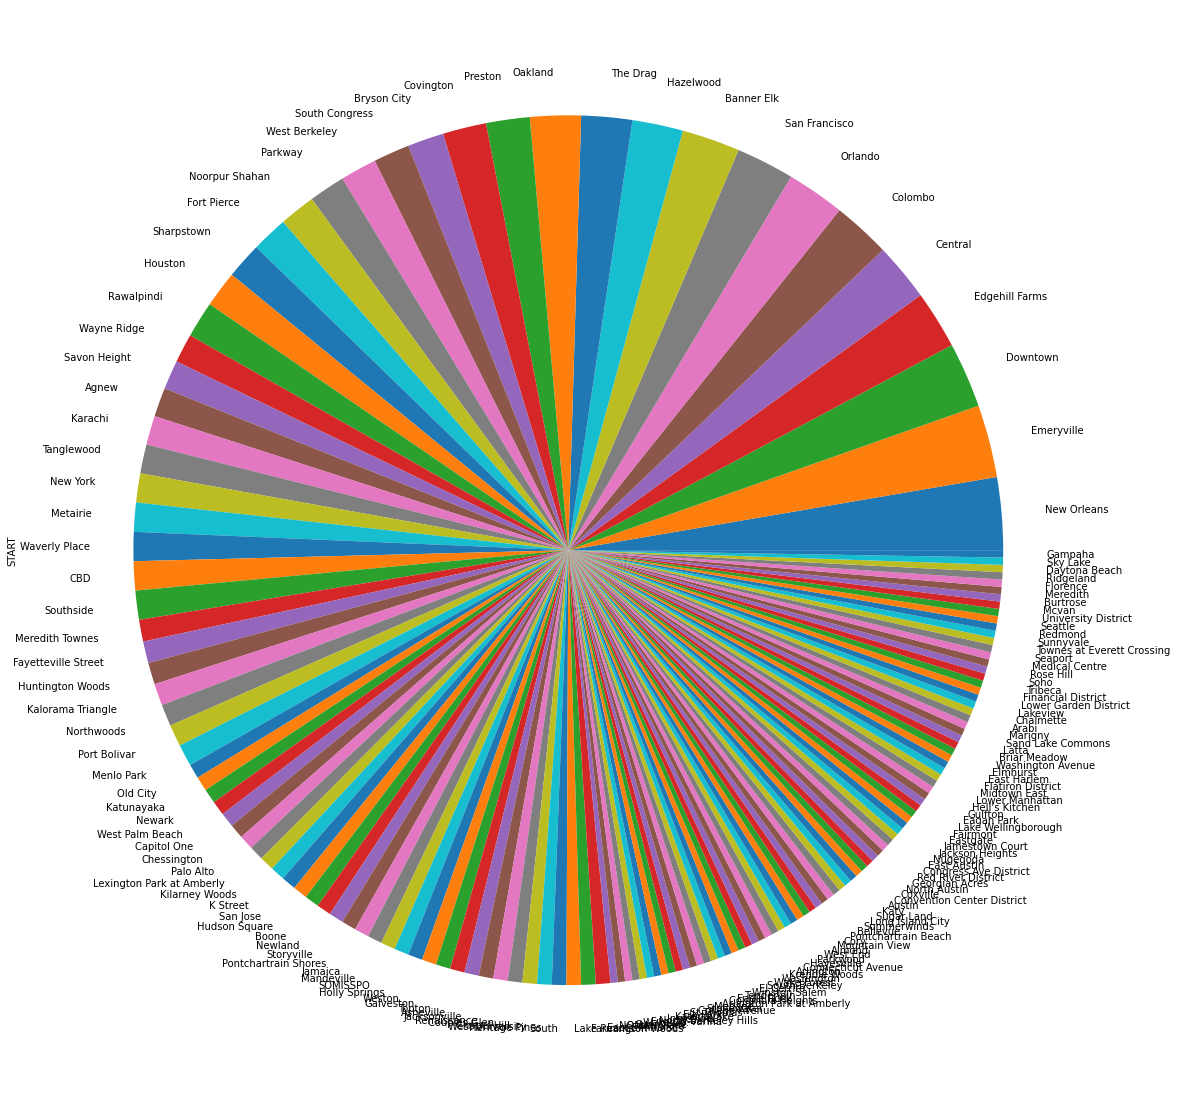

In [ ]:
plt.figure(figsize=(20,20))
start_point[start_point<=10].plot(kind='pie')

In [ ]:
stop_point=df['STOP'].value_counts()
stop_point

Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: STOP, Length: 188, dtype: int64

<AxesSubplot:ylabel='STOP'>

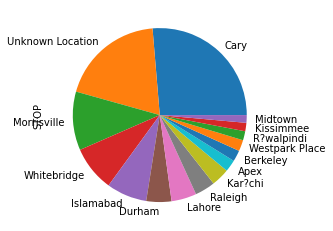

In [ ]:
stop_point[stop_point>10].plot(kind='pie')

<AxesSubplot:ylabel='STOP'>

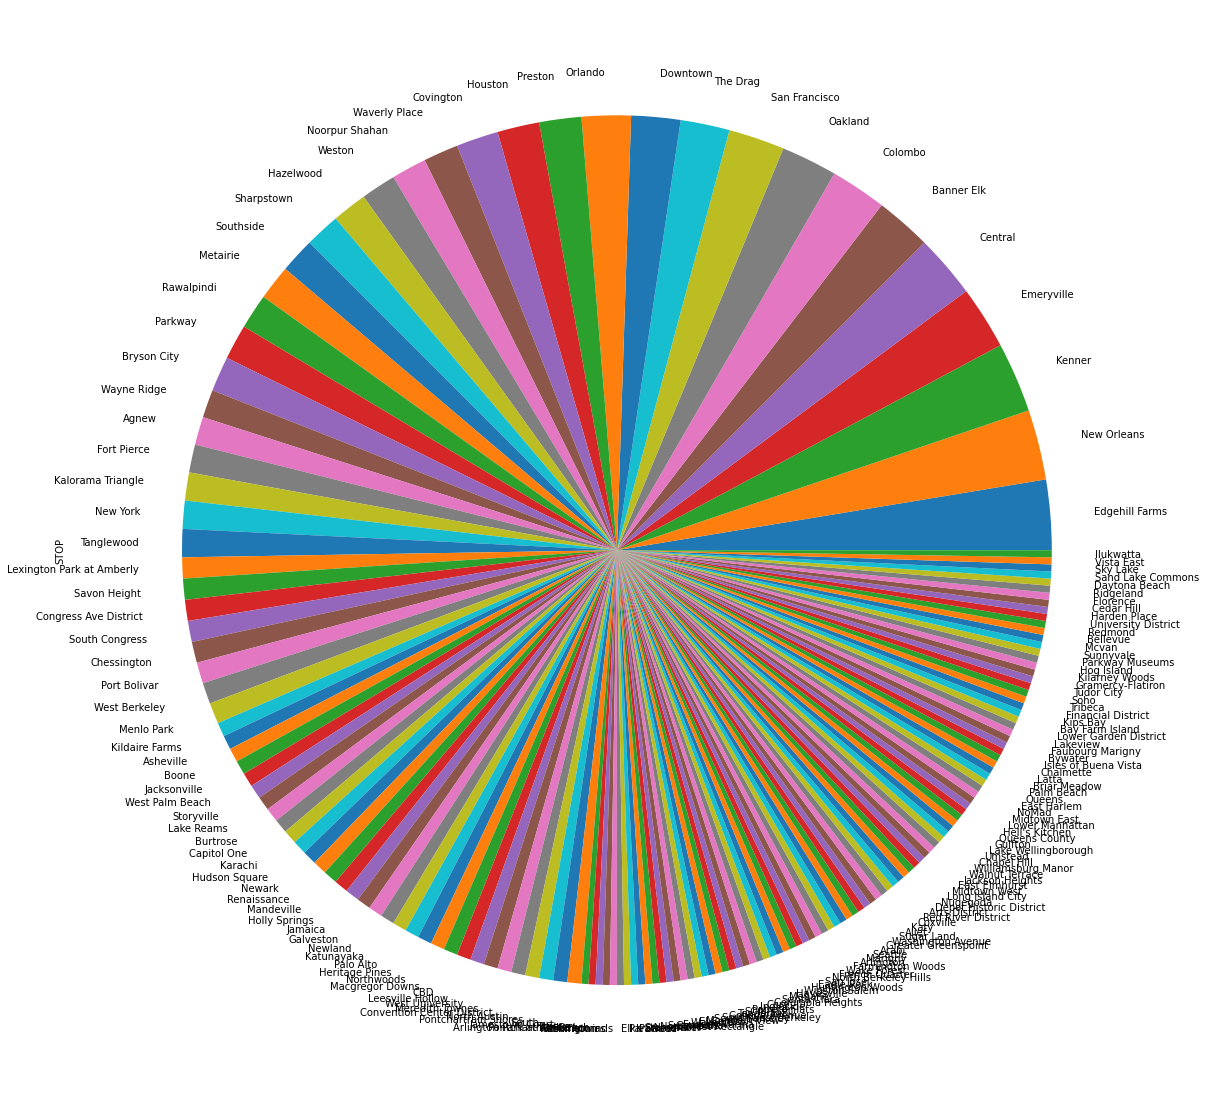

In [ ]:
plt.figure(figsize=(20,20))
stop_point[stop_point<=10].plot(kind='pie')

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
miles=df['MILES'].value_counts()
miles

9.9     28
3.1     26
2.1     19
10.4    19
3.0     19
        ..
46.9     1
40.2     1
16.6     1
19.3     1
48.2     1
Name: MILES, Length: 256, dtype: int64

<AxesSubplot:>

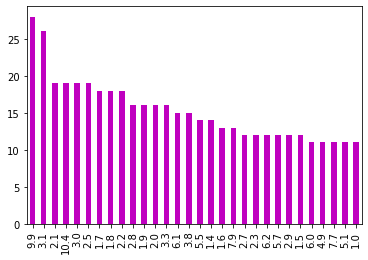

In [ ]:
miles[miles>10].plot(kind='bar',color='m')

<AxesSubplot:ylabel='MILES'>

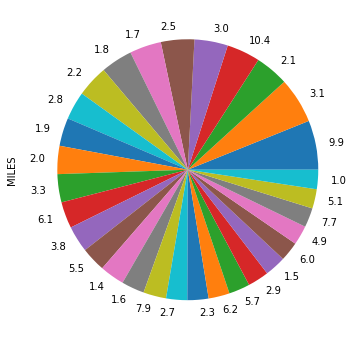

In [ ]:
plt.figure(figsize=(6,6))
miles[miles>10].plot(kind='pie')

<AxesSubplot:>

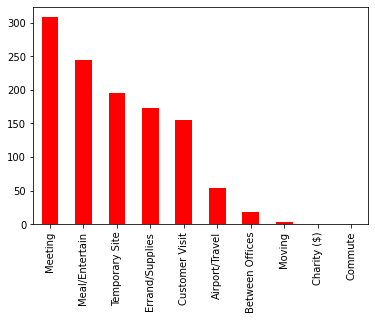

In [ ]:
df['PURPOSE'].value_counts().plot(kind='bar',color='r')

<AxesSubplot:xlabel='PURPOSE', ylabel='count'>

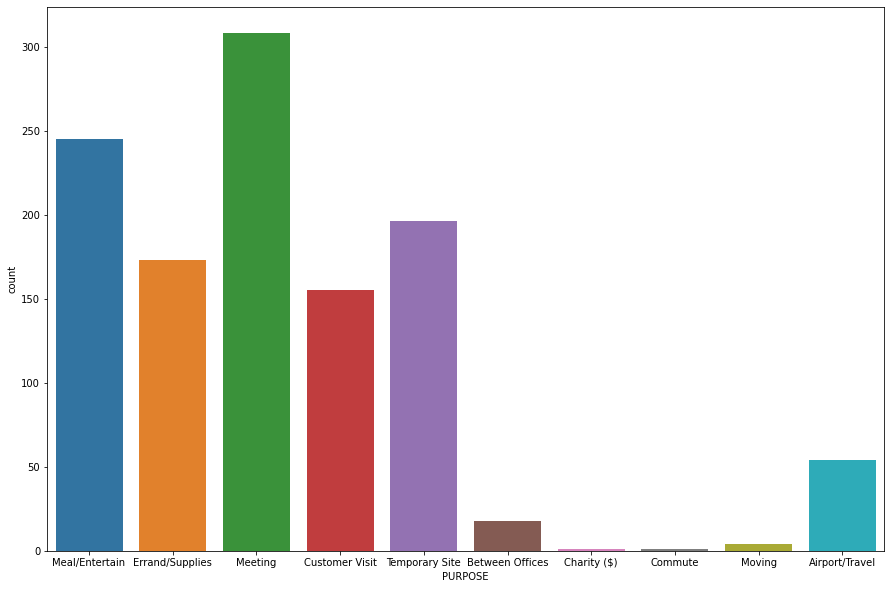

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(df['PURPOSE'])

In [ ]:
df['MINUTES']=df.END_DATE-df.START_DATE

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In [ ]:
#The dt.total_seconds() function is used to return total duration of each element expressed in seconds.
df['MINUTES']=df['MINUTES'].dt.total_seconds()/60

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


<AxesSubplot:xlabel='PURPOSE', ylabel='MILES'>

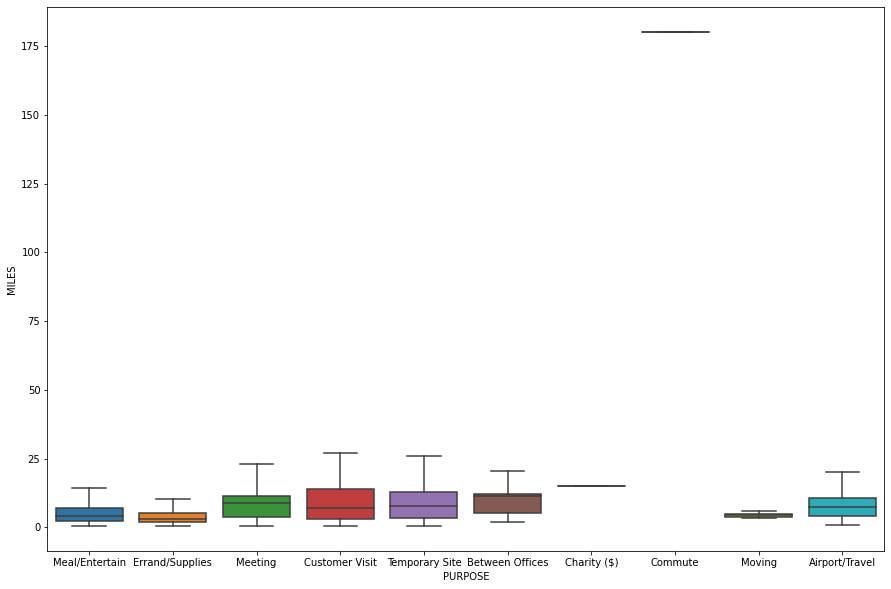

In [ ]:
# showfliers = False to remove outlier observations from the plot
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x=df['PURPOSE'],y=df['MILES'],showfliers=False)

<AxesSubplot:xlabel='PURPOSE', ylabel='MINUTES'>

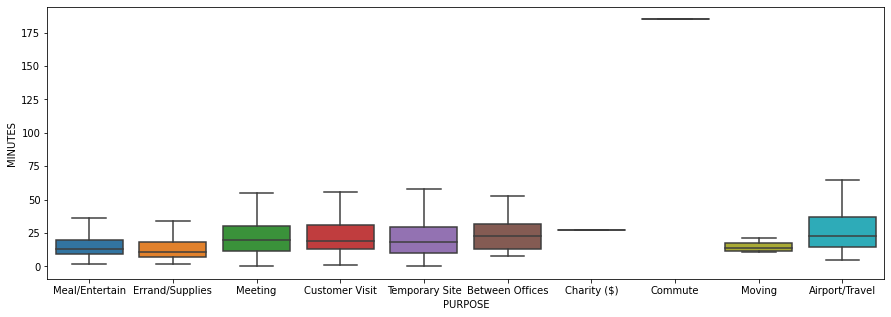

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x=df['PURPOSE'],y=df['MINUTES'],showfliers=False)

In [ ]:
pd.DataFrame({'Min':df.groupby(['PURPOSE'])['MILES'].min(),
              'Max':df.groupby(['PURPOSE'])['MILES'].max(),
              'Mean':df.groupby(['PURPOSE'])['MILES'].mean()})

,Min,Max,Mean
PURPOSE,,,
Airport/Travel,0.9,156.9,14.953704
Between Offices,1.9,39.2,10.944444
Charity ($),15.1,15.1,15.100000
Commute,180.2,180.2,180.200000
Customer Visit,0.6,310.3,16.065806
Errand/Supplies,0.5,195.3,5.928902
Meal/Entertain,0.6,36.5,5.773878
Meeting,0.7,201.0,12.652597
Moving,3.3,6.1,4.550000


In [ ]:
pd.DataFrame({'Min':df.groupby(['PURPOSE'])['MINUTES'].min(),
              'Max':df.groupby(['PURPOSE'])['MINUTES'].max(),
              'Mean':df.groupby(['PURPOSE'])['MINUTES'].mean()})

,Min,Max,Mean
PURPOSE,,,
Airport/Travel,5.0,178.0,34.925926
Between Offices,8.0,65.0,25.500000
Charity ($),27.0,27.0,27.000000
Commute,185.0,185.0,185.000000
Customer Visit,1.0,330.0,28.387097
Errand/Supplies,2.0,206.0,15.710983
Meal/Entertain,2.0,64.0,15.926531
Meeting,0.0,181.0,25.954545
Moving,11.0,21.0,15.000000


In [ ]:
df.groupby('PURPOSE')['MILES'].describe()

,count,mean,std,min,25%,50%,75%,max
PURPOSE,,,,,,,,
Airport/Travel,54.0,14.953704,26.588696,0.9,4.325,7.45,10.875,156.9
Between Offices,18.0,10.944444,8.458913,1.9,5.200,11.60,12.350,39.2
Charity ($),1.0,15.100000,NaN,15.1,15.100,15.10,15.100,15.1
Commute,1.0,180.200000,NaN,180.2,180.200,180.20,180.200,180.2
Customer Visit,155.0,16.065806,33.665367,0.6,3.150,6.90,13.950,310.3
Errand/Supplies,173.0,5.928902,15.429904,0.5,1.900,3.20,5.300,195.3
Meal/Entertain,245.0,5.773878,4.931104,0.6,2.500,4.20,7.200,36.5
Meeting,308.0,12.652597,23.597450,0.7,3.800,8.80,11.600,201.0
Moving,4.0,4.550000,1.181807,3.3,3.900,4.40,5.050,6.1


In [ ]:
def round(x):
  if x['START']==x['STOP']:
    return 'yes'
  else:
      return 'no'

In [ ]:
df['ROUND_TRIP']=df.apply(round,axis=1)

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,ROUND_TRIP
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no


<AxesSubplot:xlabel='ROUND_TRIP', ylabel='count'>

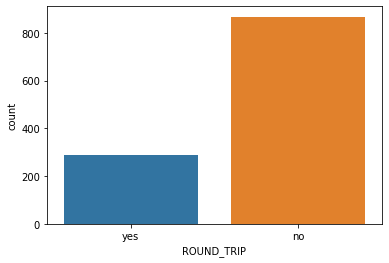

In [ ]:
sns.countplot(df['ROUND_TRIP'])

In [ ]:
#andas DatetimeIndex.month attribute outputs an Index object containing the month values present in each of the entries of the DatetimeIndex object.
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month

In [ ]:
dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

In [ ]:
df['MONTH'] = df['MONTH'].map(dict)

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,ROUND_TRIP,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,Jan


<AxesSubplot:xlabel='MONTH', ylabel='count'>

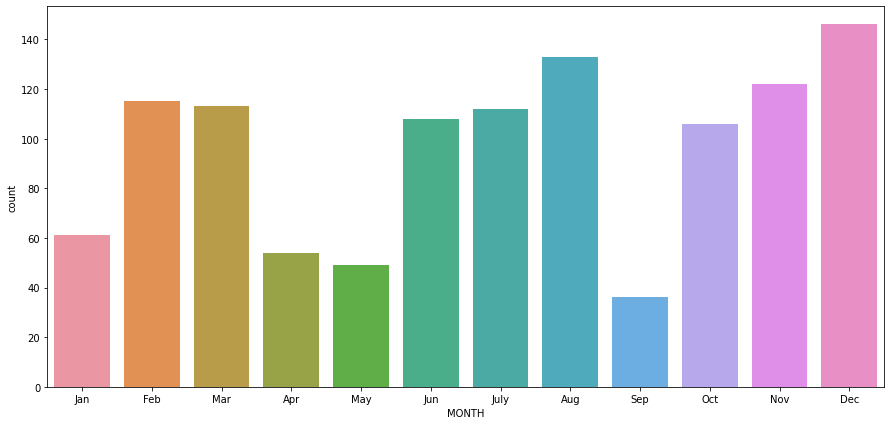

In [ ]:
plt.figure(figsize = (15, 7))
sns.countplot(df['MONTH'])

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
df.groupby(['MONTH','PURPOSE'])['ROUND_TRIP'].count()

MONTH  PURPOSE        
Apr    Between Offices     3
       Customer Visit      9
       Errand/Supplies     7
       Meal/Entertain     12
       Meeting            20
       Temporary Site      3
Aug    Airport/Travel     52
       Customer Visit     19
       Meal/Entertain     11
       Meeting            17
       Temporary Site     34
Dec    Airport/Travel      2
       Between Offices     1
       Customer Visit     26
       Errand/Supplies    47
       Meal/Entertain     31
       Meeting            30
       Temporary Site      9
Feb    Between Offices     1
       Customer Visit     14
       Errand/Supplies    15
       Meal/Entertain     25
       Meeting            35
       Temporary Site     25
Jan    Customer Visit     11
       Errand/Supplies    13
       Meal/Entertain     16
       Meeting            18
       Temporary Site      3
July   Charity ($)         1
       Commute             1
       Customer Visit      2
       Errand/Supplies    33
       Meal/Entertai

<AxesSubplot:xlabel='MINUTES', ylabel='MILES'>

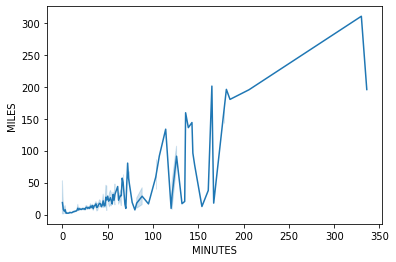

In [ ]:
#minutes taken to cover miles
sns.lineplot(data = df, x = df['MINUTES'], y = df['MILES'])

<AxesSubplot:xlabel='PURPOSE', ylabel='count'>

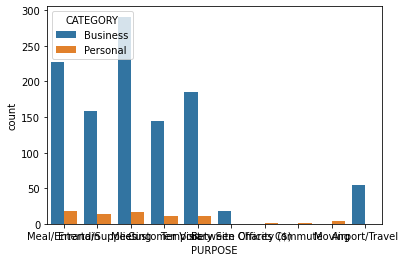

In [ ]:
sns.countplot(data = df, x = df['PURPOSE'], hue = 'CATEGORY')